In [3]:
import os
import math
import dill
from itertools import permutations

import numpy as np
import scipy as sp
from matplotlib import pyplot as plt
from matplotlib import gridspec
from sklearn.linear_model import HuberRegressor as hubreg

import suite2p as s2p

import TwoPUtils
import STX3KO_analyses as stx
from STX3KO_analyses import utilities as u

ko_mice = stx.ymaze_sess_deets.ko_mice
# ko_mice = [m for m in ko_mice if m not in ['Cre8']]
ctrl_mice = stx.ymaze_sess_deets.ctrl_mice


%matplotlib inline

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
print(ko_mice)

('4467975.1', '4467975.2', '4467975.3', '4467975.4', '4467975.5', 'Cre7', 'Cre8', 'Cre9', 'CA3-1')


In [5]:
figdir = "/mnt/BigDisk/YMazeResults/behavior/"
os.makedirs(figdir,exist_ok=True)

<ipython-input-7-e61a3fde3eed>:18: RuntimeWarning: Mean of empty slice
  mu, sem = np.nanmean(arr,axis=0), sp.stats.sem(arr, axis=0, nan_policy='omit')
/home/mplitt/anaconda3/envs/STX3_test/lib/python3.8/site-packages/numpy/core/_methods.py:233: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/mplitt/anaconda3/envs/STX3_test/lib/python3.8/site-packages/numpy/core/_methods.py:194: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(
/home/mplitt/anaconda3/envs/STX3_test/lib/python3.8/site-packages/numpy/core/_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


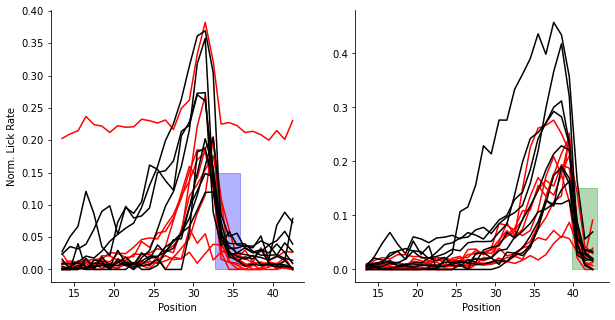

In [7]:
fig,ax = plt.subplots(1,2, figsize = [10,5])

ko_mu = {-1:[],1:[]}
for mouse in ko_mice:
    sess = u.load_vr_day(mouse,day=0, verbose = False)
    for ax_ind, lr in enumerate([-1, 1]):
        trial_mask = sess.trial_info['LR']== lr
        lick_mean = np.nanmean(sess.trial_matrices['licks'][trial_mask,:].ravel())
        
#         print(lick_mean)
#         mu, sem = np.nanmean(sess.trial_matrices['licks'][trial_mask,:]/lick_mean, axis=0), sp.stats.sem(sess.trial_matrices['licks'][trial_mask,:]/lick_mean, axis=0, nan_policy='omit')
#         mu, sem = np.nanmean(sess.trial_matrices['licks'][trial_mask,:], axis=0), sp.stats.sem(sess.trial_matrices['licks'][trial_mask,:], axis=0, nan_policy='omit')
        ax[ax_ind].plot(sess.trial_matrices['bin_centers'],np.nanmean(sess.trial_matrices['licks'][trial_mask,:], axis=0), color='red')
#         ko_mu[lr].append(mu)
#         ax[ax_ind].fill_between(sess.trial_matrices['bin_centers'], mu-sem, mu+sem, color='red', alpha = .3)
for ax_ind, lr in enumerate([-1,1]):
    arr = np.array(ko_mu[lr])
    mu, sem = np.nanmean(arr,axis=0), sp.stats.sem(arr, axis=0, nan_policy='omit')
    ax[ax_ind].fill_between(sess.trial_matrices['bin_centers'],mu- sem, mu+sem,color='red', alpha = .3)

ctrl_mu = {-1:[],1:[]}
for mouse in ctrl_mice:
    sess = u.load_vr_day(mouse,day=0, verbose=False)
    for ax_ind, lr in enumerate([-1, 1]):
        trial_mask = sess.trial_info['LR']== lr
        lick_mean = np.nanmean(sess.trial_matrices['licks'][trial_mask,:].ravel())
        
#         print(lick_mean)
        ax[ax_ind].plot(sess.trial_matrices['bin_centers'],np.nanmean(sess.trial_matrices['licks'][trial_mask,:], axis=0), color='black')
#         mu, sem = np.nanmean(sess.trial_matrices['licks'][trial_mask,:]/lick_mean, axis=0), sp.stats.sem(sess.trial_matrices['licks'][trial_mask,:]/lick_mean, axis=0, nan_policy='omit')
#         mu, sem = np.nanmean(sess.trial_matrices['licks'][trial_mask,:], axis=0), sp.stats.sem(sess.trial_matrices['licks'][trial_mask,:], axis=0, nan_policy='omit')
#         ctrl_mu[lr].append(mu)
#         ax[ax_ind].fill_between(sess.trial_matrices['bin_centers'], mu-sem, mu+sem, color='red', alpha = .3)
# for ax_ind, lr in enumerate([-1,1]):
#     arr = np.array(ctrl_mu[lr])
#     mu, sem = np.nanmean(arr,axis=0), sp.stats.sem(arr, axis=0, nan_policy='omit')
#     ax[ax_ind].fill_between(sess.trial_matrices['bin_centers'],mu- sem, mu+sem,color='black', alpha = .3)
    
    
ax[1].fill_betweenx([0,.15], sess.rzone_late['tfront'], sess.rzone_late['tback'],zorder=0, color='green',alpha=.3)
ax[0].fill_betweenx([0,.15],sess.rzone_early['tfront'], sess.rzone_early['tback'],zorder=0, color='blue',alpha=.3)

ax[0].set_xlabel('Position')
ax[1].set_xlabel('Position')
ax[0].set_ylabel('Norm. Lick Rate')
ax[0].spines['top'].set_visible(False)
ax[1].spines['top'].set_visible(False)
ax[0].spines['right'].set_visible(False)
ax[1].spines['right'].set_visible(False)

# fig.savefig(os.path.join(figdir, 'LR_norm_lickrate_day1.pdf'))

{'date': '03_10_2020', 'scene': 'YMaze_LNovel', 'session': 1, 'scan': 3, 'novel_arm': -1, 'ravel_ind': 6}
{'date': '03_10_2020', 'scene': 'YMaze_LNovel', 'session': 1, 'scan': 8, 'novel_arm': 1, 'ravel_ind': 5}
{'date': '03_10_2020', 'scene': 'YMaze_LNovel', 'session': 1, 'scan': 6, 'novel_arm': -1, 'ravel_ind': 5}
{'date': '03_10_2020', 'scene': 'YMaze_LNovel', 'session': 1, 'scan': 4, 'novel_arm': 1, 'ravel_ind': 5}
{'date': '03_10_2020', 'scene': 'YMaze_LNovel', 'session': 1, 'scan': 5, 'novel_arm': -1, 'ravel_ind': 5}
{'date': '23_10_2021', 'scene': 'YMaze_LNovel', 'session': 1, 'scan': 2, 'novel_arm': 1, 'ravel_ind': 5}
{'date': '21_10_2021', 'scene': 'YMaze_LNovel', 'session': 2, 'scan': 2, 'novel_arm': 1, 'ravel_ind': 5}
{'date': '23_10_2021', 'scene': 'YMaze_LNovel', 'session': 2, 'scan': 2, 'novel_arm': -1, 'ravel_ind': 5}
{'date': '28_10_2021', 'scene': 'YMaze_LNovel', 'session': 2, 'scan': -1, 'novel_arm': -1, 'ravel_ind': 5}


<ipython-input-8-c888828c2980>:21: RuntimeWarning: Mean of empty slice
  mu, sem = np.nanmean(arr,axis=0), sp.stats.sem(arr, axis=0, nan_policy='omit')
/home/mplitt/anaconda3/envs/STX3_test/lib/python3.8/site-packages/numpy/core/_methods.py:233: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/mplitt/anaconda3/envs/STX3_test/lib/python3.8/site-packages/numpy/core/_methods.py:194: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(
/home/mplitt/anaconda3/envs/STX3_test/lib/python3.8/site-packages/numpy/core/_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


{'date': '04_12_2020', 'scene': 'YMaze_LNovel', 'session': 1, 'scan': 2, 'novel_arm': -1, 'ravel_ind': 5}
{'date': '04_12_2020', 'scene': 'YMaze_LNovel', 'session': 1, 'scan': 3, 'novel_arm': 1, 'ravel_ind': 6}
{'date': '04_12_2020', 'scene': 'YMaze_LNovel', 'session': 1, 'scan': 2, 'novel_arm': -1, 'ravel_ind': 5}
{'date': '04_12_2020', 'scene': 'YMaze_LNovel', 'session': 1, 'scan': 3, 'novel_arm': 1, 'ravel_ind': 7}
{'date': '05_12_2020', 'scene': 'YMaze_LNovel', 'session': 1, 'scan': 2, 'novel_arm': -1, 'ravel_ind': 5}
{'date': '19_10_2021', 'scene': 'YMaze_LNovel', 'session': 1, 'scan': 5, 'novel_arm': 1, 'ravel_ind': 5}
{'date': '19_10_2021', 'scene': 'YMaze_LNovel', 'session': 1, 'scan': 2, 'novel_arm': -1, 'ravel_ind': 5}
{'date': '20_10_2021', 'scene': 'YMaze_LNovel', 'session': 1, 'scan': 2, 'novel_arm': 1, 'ravel_ind': 5}
{'date': '21_10_2021', 'scene': 'YMaze_LNovel', 'session': 1, 'scan': 2, 'novel_arm': 1, 'ravel_ind': 5}


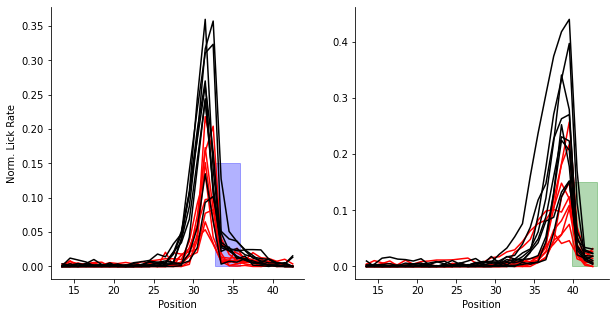

In [8]:
fig,ax = plt.subplots(1,2, figsize = [10,5])

ko_mu = {-1:[],1:[]}
for mouse in ko_mice:
    sess = u.load_vr_day(mouse,day=5)
    for ax_ind, lr in enumerate([-1, 1]):
        trial_mask = sess.trial_info['LR']== lr
        ax[ax_ind].plot(sess.trial_matrices['bin_centers'],np.nanmean(sess.trial_matrices['licks'][trial_mask,:], axis=0), color='red')
#         lick_mean = np.nanmean(sess.trial_matrices['licks'][trial_mask,:].ravel())
        
        
# #         mu, sem = np.nanmean(sess.trial_matrices['licks'][trial_mask,:]/lick_mean, axis=0), sp.stats.sem(sess.trial_matrices['licks'][trial_mask,:]/lick_mean, axis=0, nan_policy='omit')
#         mu, sem = np.nanmean(sess.trial_matrices['licks'][trial_mask,:], axis=0), sp.stats.sem(sess.trial_matrices['licks'][trial_mask,:], axis=0, nan_policy='omit')
        
# #         mu = sp.stats.zscore(np.nanmean(sess.trial_matrices['licks'][trial_mask,:], axis=0))
#         ko_mu[lr].append(mu)

        
for ax_ind, lr in enumerate([-1,1]):
    arr = np.array(ko_mu[lr])
    mu, sem = np.nanmean(arr,axis=0), sp.stats.sem(arr, axis=0, nan_policy='omit')
    ax[ax_ind].fill_between(sess.trial_matrices['bin_centers'],mu- sem, mu+sem,color='red', alpha = .3)
#     ax[ax_ind].plot(sess.trial_matrices['bin_centers'],arr.T)

ctrl_mu = {-1:[],1:[]}
for mouse in ctrl_mice:
    sess = u.load_vr_day(mouse,day=5)
    for ax_ind, lr in enumerate([-1, 1]):
        trial_mask = sess.trial_info['LR']== lr
        ax[ax_ind].plot(sess.trial_matrices['bin_centers'],np.nanmean(sess.trial_matrices['licks'][trial_mask,:], axis=0), color='black')
#         lick_mean = np.nanmean(sess.trial_matrices['licks'][trial_mask,:].ravel())
        
# #         print(lick_mean)
# #         mu, sem = np.nanmean(sess.trial_matrices['licks'][trial_mask,:]/lick_mean, axis=0), sp.stats.sem(sess.trial_matrices['licks'][trial_mask,:]/lick_mean, axis=0, nan_policy='omit')
#         mu, sem = np.nanmean(sess.trial_matrices['licks'][trial_mask,:], axis=0), sp.stats.sem(sess.trial_matrices['licks'][trial_mask,:], axis=0, nan_policy='omit')
# #         mu = sp.stats.zscore(np.nanmean(sess.trial_matrices['licks'][trial_mask,:], axis=0))
#         ctrl_mu[lr].append(mu)
# #         ax[ax_ind].fill_between(sess.trial_matrices['bin_centers'], mu-sem, mu+sem, color='red', alpha = .3)
# for ax_ind, lr in enumerate([-1,1]):
#     arr = np.array(ctrl_mu[lr])
#     mu, sem = np.nanmean(arr,axis=0), sp.stats.sem(arr, axis=0, nan_policy='omit')
#     ax[ax_ind].fill_between(sess.trial_matrices['bin_centers'],mu- sem, mu+sem,color='black', alpha = .3)
    
    
ax[1].fill_betweenx([0,.15], sess.rzone_late['tfront'], sess.rzone_late['tback'],zorder=0, color='green',alpha=.3)
ax[0].fill_betweenx([0,.15],sess.rzone_early['tfront'], sess.rzone_early['tback'],zorder=0, color='blue',alpha=.3)

ax[0].set_xlabel('Position')
ax[1].set_xlabel('Position')
ax[0].set_ylabel('Norm. Lick Rate')
ax[0].spines['top'].set_visible(False)
ax[1].spines['top'].set_visible(False)
ax[0].spines['right'].set_visible(False)
ax[1].spines['right'].set_visible(False)

# fig.savefig(os.path.join(figdir, 'LR_norm_lickrate_day6.pdf'))

({'date': '28_09_2020', 'scene': 'YMaze_LNovel', 'session': 1, 'scan': 3, 'novel_arm': -1, 'ravel_ind': 0}, {'date': '28_09_2020', 'scene': 'YMaze_LNovel', 'session': 6, 'scan': 14, 'novel_arm': -1, 'ravel_ind': 1})
0.0380219253427229
0.04187172978640569
{'date': '28_09_2020', 'scene': 'YMaze_LNovel', 'session': 3, 'scan': 8, 'novel_arm': 1, 'ravel_ind': 0}
0.03966649222940868
0.06724467821944047
{'date': '28_09_2020', 'scene': 'YMaze_LNovel', 'session': 1, 'scan': 4, 'novel_arm': -1, 'ravel_ind': 0}
0.02559418678786799
0.044714157459503676
{'date': '28_09_2020', 'scene': 'YMaze_LNovel', 'session': 1, 'scan': 5, 'novel_arm': 1, 'ravel_ind': 0}
0.23433962062351255
0.05199544921487973
{'date': '28_09_2020', 'scene': 'YMaze_LNovel', 'session': 1, 'scan': 4, 'novel_arm': -1, 'ravel_ind': 0}
0.012956958745973458
0.02220331193032048
{'date': '18_10_2021', 'scene': 'YMaze_LNovel', 'session': 1, 'scan': 3, 'novel_arm': 1, 'ravel_ind': 0}
0.03633403449671074
0.05875064715297439
{'date': '16_10_

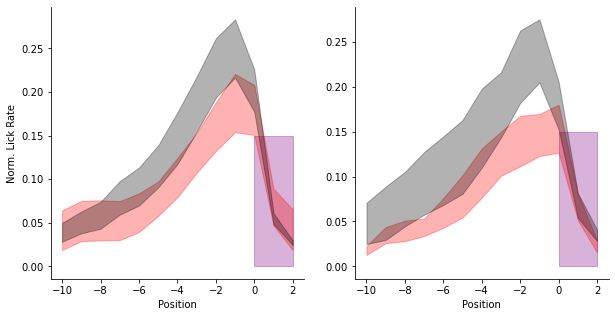

In [11]:
fig,ax = plt.subplots(1,2, figsize = [10,5])

ko_mu = {'fam':[],'nov':[]}
x = np.arange(-10,3)
for mouse in ko_mice:
    sess = u.load_vr_day(mouse,day=0)
    bin_edges = sess.trial_matrices['bin_edges']
    for ax_ind, lr in enumerate([-1, 1]):
        trial_mask = sess.trial_info['LR']== lr
        lick_mean = np.nanmean(sess.trial_matrices['licks'][trial_mask,:].ravel())
        
        print(lick_mean)
#         mu = np.nanmean(sess.trial_matrices['licks'][trial_mask,:]/lick_mean, axis=0)
        mu = np.nanmean(sess.trial_matrices['licks'][trial_mask,:], axis=0)
        
        if sess.novel_arm ==-1:
            
            fam_rzone_front = np.argwhere((sess.rzone_late['tfront']<=bin_edges[1:])*(sess.rzone_late['tfront']>=bin_edges[:-1]))[0][0]
            nov_rzone_front = np.argwhere((sess.rzone_early['tfront']<=bin_edges[1:])*(sess.rzone_early['tfront']>=bin_edges[:-1]))[0][0]

        elif sess.novel_arm == 1:
            fam_rzone_front = np.argwhere((sess.rzone_early['tfront']<=bin_edges[1:])*(sess.rzone_early['tfront']>=bin_edges[:-1]))[0][0]
            nov_rzone_front = np.argwhere((sess.rzone_late['tfront']<=bin_edges[1:])*(sess.rzone_late['tfront']>=bin_edges[:-1]))[0][0]
        
        if lr == sess.novel_arm:
            ko_mu['nov'].append(mu[nov_rzone_front-10:nov_rzone_front+3])
        else:
            ko_mu['fam'].append(mu[fam_rzone_front-10:fam_rzone_front+3])
            
ctrl_mu = {'fam':[],'nov':[]}
x = np.arange(-10,3)
for mouse in ctrl_mice:
    sess = u.load_vr_day(mouse,day=0)
    bin_edges = sess.trial_matrices['bin_edges']
    for ax_ind, lr in enumerate([-1, 1]):
        trial_mask = sess.trial_info['LR']== lr
        lick_mean = np.nanmean(sess.trial_matrices['licks'][trial_mask,:].ravel())
        
        print(lick_mean)
#         mu = np.nanmean(sess.trial_matrices['licks'][trial_mask,:]/lick_mean, axis=0)
        mu = np.nanmean(sess.trial_matrices['licks'][trial_mask,:], axis=0)
        
        if sess.novel_arm ==-1:
            
            fam_rzone_front = np.argwhere((sess.rzone_late['tfront']<=bin_edges[1:])*(sess.rzone_late['tfront']>=bin_edges[:-1]))[0][0]
            nov_rzone_front = np.argwhere((sess.rzone_early['tfront']<=bin_edges[1:])*(sess.rzone_early['tfront']>=bin_edges[:-1]))[0][0]

        elif sess.novel_arm == 1:
            fam_rzone_front = np.argwhere((sess.rzone_early['tfront']<=bin_edges[1:])*(sess.rzone_early['tfront']>=bin_edges[:-1]))[0][0]
            nov_rzone_front = np.argwhere((sess.rzone_late['tfront']<=bin_edges[1:])*(sess.rzone_late['tfront']>=bin_edges[:-1]))[0][0]
        
        if lr == sess.novel_arm:
            ctrl_mu['nov'].append(mu[nov_rzone_front-10:nov_rzone_front+3])
        else:
            ctrl_mu['fam'].append(mu[fam_rzone_front-10:fam_rzone_front+3])
        
    


for ax_ind, lr in enumerate(['fam', 'nov']):
    arr = np.array(ko_mu[lr])
    mu, sem = np.nanmean(arr,axis=0), sp.stats.sem(arr, axis=0, nan_policy='omit')
    ax[ax_ind].fill_between(x, mu- sem, mu+sem,color='red', alpha = .3)
    
    arr = np.array(ctrl_mu[lr])
    mu, sem = np.nanmean(arr,axis=0), sp.stats.sem(arr, axis=0, nan_policy='omit')
    ax[ax_ind].fill_between(x, mu- sem, mu+sem,color='black', alpha = .3)
#     ax[ax_ind].plot(x, np.array(ko_mu[lr]).T,color='red', alpha = .3)


    
ax[0].fill_betweenx([0,.15], 0, 2, zorder=0, color='purple',alpha=.3)
ax[1].fill_betweenx([0,.15],0, 2, zorder=0, color='purple',alpha=.3)

ax[0].set_xlabel('Position')
ax[1].set_xlabel('Position')
ax[0].set_ylabel('Norm. Lick Rate')
ax[0].spines['top'].set_visible(False)
ax[1].spines['top'].set_visible(False)
ax[0].spines['right'].set_visible(False)
ax[1].spines['right'].set_visible(False)

fig.savefig(os.path.join(figdir, 'famnov_norm_lickrate_day1.pdf'))

4467975.1
{'date': '03_10_2020', 'scene': 'YMaze_LNovel', 'session': 1, 'scan': 3, 'novel_arm': -1, 'ravel_ind': 6}
0.019448069832722823
0.024383682233103124
4467975.2
{'date': '03_10_2020', 'scene': 'YMaze_LNovel', 'session': 1, 'scan': 8, 'novel_arm': 1, 'ravel_ind': 5}
0.015189502462669164
0.02066231186822222
4467975.3
{'date': '03_10_2020', 'scene': 'YMaze_LNovel', 'session': 1, 'scan': 6, 'novel_arm': -1, 'ravel_ind': 5}
0.01145917726404935
0.011681737978422785
4467975.4
{'date': '03_10_2020', 'scene': 'YMaze_LNovel', 'session': 1, 'scan': 4, 'novel_arm': 1, 'ravel_ind': 5}
0.01027369876926524
0.012796976202938298
4467975.5
{'date': '03_10_2020', 'scene': 'YMaze_LNovel', 'session': 1, 'scan': 5, 'novel_arm': -1, 'ravel_ind': 5}
0.006073098821476225
0.008123663772905644
Cre7
{'date': '23_10_2021', 'scene': 'YMaze_LNovel', 'session': 1, 'scan': 2, 'novel_arm': 1, 'ravel_ind': 5}
0.009296105251621372
0.009182209372844438
Cre8
{'date': '21_10_2021', 'scene': 'YMaze_LNovel', 'session':

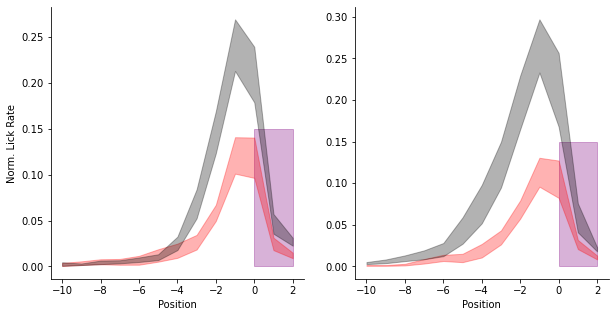

In [12]:
fig,ax = plt.subplots(1,2, figsize = [10,5])

ko_mu = {'fam':[],'nov':[]}
x = np.arange(-10,3)
for mouse in ko_mice:
    print(mouse)
    sess = u.load_vr_day(mouse,day=5)
    bin_edges = sess.trial_matrices['bin_edges']
    for ax_ind, lr in enumerate([-1, 1]):
        trial_mask = sess.trial_info['LR']== lr
        lick_mean = np.nanmean(sess.trial_matrices['licks'][trial_mask,:].ravel())
        
        print(lick_mean)
#         mu = np.nanmean(sess.trial_matrices['licks'][trial_mask,:]/lick_mean, axis=0)
        mu = np.nanmean(sess.trial_matrices['licks'][trial_mask,:], axis=0)
        
        if sess.novel_arm ==-1:
            
            fam_rzone_front = np.argwhere((sess.rzone_late['tfront']<=bin_edges[1:])*(sess.rzone_late['tfront']>=bin_edges[:-1]))[0][0]
            nov_rzone_front = np.argwhere((sess.rzone_early['tfront']<=bin_edges[1:])*(sess.rzone_early['tfront']>=bin_edges[:-1]))[0][0]

        elif sess.novel_arm == 1:
            fam_rzone_front = np.argwhere((sess.rzone_early['tfront']<=bin_edges[1:])*(sess.rzone_early['tfront']>=bin_edges[:-1]))[0][0]
            nov_rzone_front = np.argwhere((sess.rzone_late['tfront']<=bin_edges[1:])*(sess.rzone_late['tfront']>=bin_edges[:-1]))[0][0]
        
        if lr == sess.novel_arm:
            ko_mu['nov'].append(mu[nov_rzone_front-10:nov_rzone_front+3])
        else:
            ko_mu['fam'].append(mu[fam_rzone_front-10:fam_rzone_front+3])
            
ctrl_mu = {'fam':[],'nov':[]}
x = np.arange(-10,3)
for mouse in ctrl_mice:
    sess = u.load_vr_day(mouse,day=5)
    bin_edges = sess.trial_matrices['bin_edges']
    for ax_ind, lr in enumerate([-1, 1]):
        trial_mask = sess.trial_info['LR']== lr
        lick_mean = np.nanmean(sess.trial_matrices['licks'][trial_mask,:].ravel())
        
        print(lick_mean)
#         mu = np.nanmean(sess.trial_matrices['licks'][trial_mask,:]/lick_mean, axis=0)
        mu = np.nanmean(sess.trial_matrices['licks'][trial_mask,:], axis=0)
        
        if sess.novel_arm ==-1:
            
            fam_rzone_front = np.argwhere((sess.rzone_late['tfront']<=bin_edges[1:])*(sess.rzone_late['tfront']>=bin_edges[:-1]))[0][0]
            nov_rzone_front = np.argwhere((sess.rzone_early['tfront']<=bin_edges[1:])*(sess.rzone_early['tfront']>=bin_edges[:-1]))[0][0]

        elif sess.novel_arm == 1:
            fam_rzone_front = np.argwhere((sess.rzone_early['tfront']<=bin_edges[1:])*(sess.rzone_early['tfront']>=bin_edges[:-1]))[0][0]
            nov_rzone_front = np.argwhere((sess.rzone_late['tfront']<=bin_edges[1:])*(sess.rzone_late['tfront']>=bin_edges[:-1]))[0][0]
        
        if lr == sess.novel_arm:
            ctrl_mu['nov'].append(mu[nov_rzone_front-10:nov_rzone_front+3])
        else:
            ctrl_mu['fam'].append(mu[fam_rzone_front-10:fam_rzone_front+3])
        
    


for ax_ind, lr in enumerate(['fam', 'nov']):
    arr = np.array(ko_mu[lr])
    mu, sem = np.nanmean(arr,axis=0), sp.stats.sem(arr, axis=0, nan_policy='omit')
    ax[ax_ind].fill_between(x, mu- sem, mu+sem,color='red', alpha = .3)
    
    arr = np.array(ctrl_mu[lr])
    mu, sem = np.nanmean(arr,axis=0), sp.stats.sem(arr, axis=0, nan_policy='omit')
    ax[ax_ind].fill_between(x, mu- sem, mu+sem,color='black', alpha = .3)
#     ax[ax_ind].plot(x, np.array(ko_mu[lr]).T,color='red', alpha = .3)


    
ax[0].fill_betweenx([0,.15], 0, 2, zorder=0, color='purple',alpha=.3)
ax[1].fill_betweenx([0,.15],0, 2, zorder=0, color='purple',alpha=.3)

ax[0].set_xlabel('Position')
ax[1].set_xlabel('Position')
ax[0].set_ylabel('Norm. Lick Rate')
ax[0].spines['top'].set_visible(False)
ax[1].spines['top'].set_visible(False)
ax[0].spines['right'].set_visible(False)
ax[1].spines['right'].set_visible(False)

fig.savefig(os.path.join(figdir, 'famnov_norm_lickrate_day6.pdf'))

In [31]:
# reversal lick rates
def reversal_lickmat(mice, date_inds = [6,7]):
    l_lickmat = np.zeros([len(mice), 60, 30])*np.nan
    r_lickmat = np.zeros([len(mice), 60, 30])*np.nan
    
    b_l = np.zeros([len(mice),1,1])
    b_r = np.zeros([len(mice),1,1])
    
    for i, mouse in enumerate(mice):
        concat_sess = u.single_mouse_concat_vr_sessions(mouse, date_inds = date_inds)
        
        b_mask = (concat_sess.trial_info['block_number']<2) * (concat_sess.trial_info['sess_num']==6)
        b_l_mask, b_r_mask = (b_mask * (concat_sess.trial_info['LR']==-1)), (b_mask*(concat_sess.trial_info['LR']==1))
    
        rev_mask = ((concat_sess.trial_info['block_number']>=2)*(concat_sess.trial_info['sess_num']==6) + (concat_sess.trial_info['sess_num']==7) + \
              (concat_sess.trial_info['sess_num']==8)*(concat_sess.trial_info['block_number']<2))>0

        l_rev_mask = rev_mask * (concat_sess.trial_info['LR']==-1)
        r_rev_mask = rev_mask * (concat_sess.trial_info['LR']==1)
        
        tmp_l = concat_sess.trial_matrices['licks'][l_rev_mask,:]
        max_trial = np.minimum(60, tmp_l.shape[0])
        print(max_trial)
        l_lickmat[i,:max_trial,:] = tmp_l[:max_trial,:]
        
        tmp_r = concat_sess.trial_matrices['licks'][r_rev_mask,:]
        max_trial = np.minimum(60, tmp_r.shape[0])
        print(max_trial)
        r_lickmat[i,:max_trial,:] = tmp_r[:max_trial,:]
        
        b_l[i] = np.nanmean(np.nanmean(concat_sess.trial_matrices['licks'][b_l_mask,:],axis=0))
        b_r[i] = np.nanmean(np.nanmean(concat_sess.trial_matrices['licks'][b_r_mask,:], axis=0))
        
#     return l_lickmat/b_l, r_lickmat/b_r
    return l_lickmat, r_lickmat

In [32]:
sess= u.load_vr_day(ko_mice[0],0)

{'date': '28_09_2020', 'scene': 'YMaze_LNovel', 'session': 6, 'scan': 14, 'novel_arm': -1, 'ravel_ind': 1}


In [33]:
ko_l_lickmat, ko_r_lickmat = reversal_lickmat(ko_mice)

05_10_2020 YMaze_RewardReversal
60
60
05_10_2020 YMaze_RewardReversal
60
60
05_10_2020 YMaze_RewardReversal
60
60
05_10_2020 YMaze_RewardReversal
60
60
05_10_2020 YMaze_RewardReversal
60
51


IndexError: tuple index out of range

In [28]:
ctrl_l_lickmat, ctrl_r_lickmat = reversal_lickmat(ctrl_mice)

57
43
48
52
48
50
52
48
53
47
50
50
48
48
58
40
53
47


-3.8546622194352027 0.0015590087089339172
-3.0666190411088463 0.007833316810859794
nan nan
nan nan
nan nan
nan nan


<ipython-input-29-3d20852cadf6>:11: RuntimeWarning: Mean of empty slice
  mu, sem = np.nanmean(np.nanmean(ko_l_lickmat[:,start:start+10,:],axis=1),axis=0), sp.stats.sem(np.nanmean(ko_l_lickmat[:,start:start+10,:],axis=1),axis=0)
<ipython-input-29-3d20852cadf6>:21: RuntimeWarning: Mean of empty slice
  _ko = np.nanmean(np.nanmean(ko_l_lickmat[:,start:start+10,:],axis=1)[:,rzone_early],axis=1)
<ipython-input-29-3d20852cadf6>:34: RuntimeWarning: Mean of empty slice
  mu, sem = np.nanmean(np.nanmean(ko_r_lickmat[:,start:start+10,:],axis=1),axis=0), sp.stats.sem(np.nanmean(ko_r_lickmat[:,start:start+10,:], axis=1),axis=0)
<ipython-input-29-3d20852cadf6>:22: RuntimeWarning: Mean of empty slice
  _ctrl = np.nanmean(np.nanmean(ctrl_l_lickmat[:,start:start+10,:],axis=1)[:,rzone_early],axis=1)


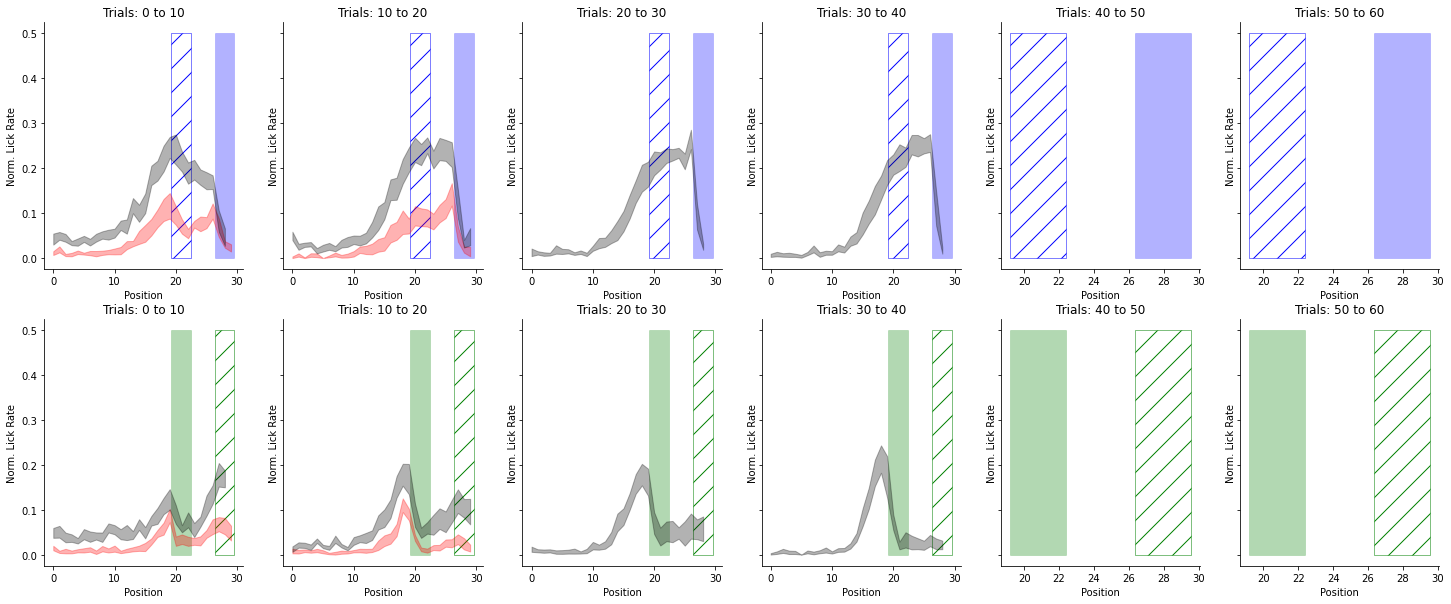

In [29]:
fig,ax = plt.subplots(2,6, figsize= [25,10], sharey=True)
for i,start in enumerate(range(0,60,10)):
    
    ax[0,i].fill_betweenx([0,.5], sess.rzone_early['tfront']-sess.trial_matrices['bin_centers'][0], 
                          sess.rzone_early['tback']-sess.trial_matrices['bin_centers'][0], 
                          color="none",alpha=1, hatch='/', edgecolor='blue',linewidth=0.5)
    ax[0,i].fill_betweenx([0,.5], sess.rzone_late['tfront']-sess.trial_matrices['bin_centers'][0], 
                          sess.rzone_late['tback']-sess.trial_matrices['bin_centers'][0], 
                          color="blue",alpha=.3, linewidth=0.5)
    
    mu, sem = np.nanmean(np.nanmean(ko_l_lickmat[:,start:start+10,:],axis=1),axis=0), sp.stats.sem(np.nanmean(ko_l_lickmat[:,start:start+10,:],axis=1),axis=0)
#     ax[i].plot(ko_l_lickmat[:,start:start+10,:].mean(axis=1).T)
    ax[0,i].fill_between(np.arange(30), mu-sem, mu+sem, color='red', alpha=.3)
    
    mu, sem = ctrl_l_lickmat[:,start:start+10,:].mean(axis=1).mean(axis=0), sp.stats.sem(ctrl_l_lickmat[:,start:start+10,:].mean(axis=1),axis=0)
    ax[0,i].fill_between(np.arange(30), mu-sem, mu+sem, color='black', alpha=.3)
    
    
    t_early_bins = sess.trial_matrices['bin_edges'][1:]
    rzone_early = (t_early_bins>=sess.rzone_early['t_antic'])*(t_early_bins<=sess.rzone_early['tfront'])
    _ko = np.nanmean(np.nanmean(ko_l_lickmat[:,start:start+10,:],axis=1)[:,rzone_early],axis=1)
    _ctrl = np.nanmean(np.nanmean(ctrl_l_lickmat[:,start:start+10,:],axis=1)[:,rzone_early],axis=1)
    t,p = sp.stats.ttest_ind(_ko,_ctrl)
    print(t,p)
    
    
    ax[1,i].fill_betweenx([0,.5], sess.rzone_late['tfront']-sess.trial_matrices['bin_centers'][0], 
                          sess.rzone_late['tback']-sess.trial_matrices['bin_centers'][0], 
                          color="none",alpha=1, hatch='/', edgecolor='green',linewidth=0.5)
    ax[1,i].fill_betweenx([0,.5], sess.rzone_early['tfront']-sess.trial_matrices['bin_centers'][0], 
                          sess.rzone_early['tback']-sess.trial_matrices['bin_centers'][0], 
                          color="green",alpha=.3, linewidth=0.5)
    
    mu, sem = np.nanmean(np.nanmean(ko_r_lickmat[:,start:start+10,:],axis=1),axis=0), sp.stats.sem(np.nanmean(ko_r_lickmat[:,start:start+10,:], axis=1),axis=0)
#     ax[i].plot(ko_l_lickmat[:,start:start+10,:].mean(axis=1).T)
    ax[1,i].fill_between(np.arange(30), mu-sem, mu+sem, color='red', alpha=.3)
    
    mu, sem = ctrl_r_lickmat[:,start:start+10,:].mean(axis=1).mean(axis=0), sp.stats.sem(ctrl_r_lickmat[:,start:start+10,:].mean(axis=1),axis=0)
    ax[1,i].fill_between(np.arange(30), mu-sem, mu+sem, color='black', alpha=.3)
    
    for r in [0,1]:
        ax[r,i].spines['top'].set_visible(False)
        ax[r,i].spines['right'].set_visible(False)
        
        ax[r,i].set_xlabel('Position')
        ax[r,i].set_ylabel('Norm. Lick Rate')
        ax[r,i].set_title("Trials: %d to %d" % (start, start+10))
# fig.savefig(os.path.join(figdir, 'reversal_lickrate.pdf'))

In [43]:
def get_early_licks(sess):
    t_early_bins = sess.trial_matrices['bin_edges'][1:]
    rzone_early = (t_early_bins>=sess.rzone_early['tfront']-5)*(t_early_bins<=sess.rzone_early['tfront'])
    baseline_mask = (sess.trial_info['sess_num']==6)*(sess.trial_info['LR']==-1)*(sess.trial_info['block_number']<2)
    ret_mask = (sess.trial_info['sess_num']==8)*(sess.trial_info['block_number']>1)
    rev_mask = (~baseline_mask)*(sess.trial_info['LR']==-1)*(~ret_mask)
    
    lr_early = sess.trial_matrices['licks'][:, rzone_early].mean(axis=1)
    lr_b = lr_early[baseline_mask].mean()
    lr_rev = lr_early[rev_mask]
    return lr_rev#/lr_b
    

def get_early_lick_slope(sess):
    lr_rev = get_early_licks(sess)
    max_trial = np.minimum(lr_rev.shape[0],40)
    x = np.arange(max_trial)
    res = sp.stats.linregress(x[5:],lr_rev[5:max_trial])
    return res.slope



In [44]:
ko_lr_rev = [get_early_licks(u.single_mouse_concat_vr_sessions(mouse, date_inds=[6, ])) for mouse in ko_mice]
ctrl_lr_rev = [get_early_licks(u.single_mouse_concat_vr_sessions(mouse, date_inds=[6, ])) for mouse in ctrl_mice]

['LR', 'block_number', 'sess_num_ravel', 'sess_num']
['LR', 'block_number', 'sess_num_ravel', 'sess_num']
['LR', 'block_number', 'sess_num_ravel', 'sess_num']
['LR', 'block_number', 'sess_num_ravel', 'sess_num']
['LR', 'block_number', 'sess_num_ravel', 'sess_num']
['LR', 'block_number', 'sess_num_ravel', 'sess_num']
['LR', 'block_number', 'sess_num_ravel', 'sess_num']
['LR', 'block_number', 'sess_num_ravel', 'sess_num']
['LR', 'block_number', 'sess_num_ravel', 'sess_num']
['LR', 'block_number', 'sess_num_ravel', 'sess_num']
['LR', 'block_number', 'sess_num_ravel', 'sess_num']
['LR', 'block_number', 'sess_num_ravel', 'sess_num']
['LR', 'block_number', 'sess_num_ravel', 'sess_num']
['LR', 'block_number', 'sess_num_ravel', 'sess_num']
['LR', 'block_number', 'sess_num_ravel', 'sess_num']
['LR', 'block_number', 'sess_num_ravel', 'sess_num']
['LR', 'block_number', 'sess_num_ravel', 'sess_num']
['LR', 'block_number', 'sess_num_ravel', 'sess_num']
['LR', 'block_number', 'sess_num_ravel', 'sess

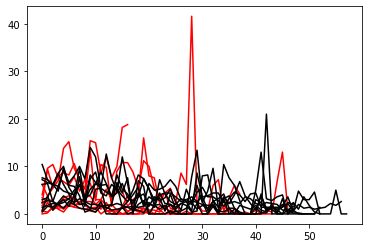

In [45]:
fig,ax = plt.subplots()
for i in range(len(ko_lr_rev)):
    ax.plot(ko_lr_rev[i], color = 'red')
for i in range(len(ctrl_lr_rev)):
    ax.plot(ctrl_lr_rev[i], color='black')

In [46]:
from statsmodels.regression.mixed_linear_model import MixedLM
import pandas as pd

In [47]:
df = pd.DataFrame({'ko': [],
                   'trial': [],
                   'trial_frac': [],
                   'mouse': [],
                   'lr': [],
                   'intercept': [],
                   'ko_x_trial': [],
                   'ko_x_trial_frac': [],
                  })

for mouse in ko_mice:
    lr = get_early_licks(u.single_mouse_concat_vr_sessions(mouse, date_inds=[6]))
#     for i, _lr in enumerate(lr[:20]):
    for i, (_lr, trial_frac) in enumerate(zip(lr, np.linspace(0,1,num=lr.shape[0]))):
        df = df.append({'mouse': mouse,
                       'trial': i,
                        'trial_frac': trial_frac,
                       'ko': 1,
                        'ko_x_trial': i,
                        'ko_x_trial_frac': trial_frac,
                       'lr': _lr,
                       'intercept': 1}, ignore_index = True)
        
for mouse in ctrl_mice:
    lr = get_early_licks(u.single_mouse_concat_vr_sessions(mouse, date_inds=[6]))
#     for i, _lr in enumerate(lr[:20]):
    for i, (_lr, trial_frac) in enumerate(zip(lr, np.linspace(0,1,num=lr.shape[0]))):
        df = df.append({'mouse': mouse,
                       'trial': i,
                        'trial_frac': trial_frac,
                       'ko': 0,
                        'ko_x_trial': 0,
                        'ko_x_trial_frac': 0,
                       'lr': _lr,
                       'intercept': 1}, ignore_index = True)

    
    


['LR', 'block_number', 'sess_num_ravel', 'sess_num']
['LR', 'block_number', 'sess_num_ravel', 'sess_num']
['LR', 'block_number', 'sess_num_ravel', 'sess_num']
['LR', 'block_number', 'sess_num_ravel', 'sess_num']
['LR', 'block_number', 'sess_num_ravel', 'sess_num']
['LR', 'block_number', 'sess_num_ravel', 'sess_num']
['LR', 'block_number', 'sess_num_ravel', 'sess_num']
['LR', 'block_number', 'sess_num_ravel', 'sess_num']
['LR', 'block_number', 'sess_num_ravel', 'sess_num']
['LR', 'block_number', 'sess_num_ravel', 'sess_num']
['LR', 'block_number', 'sess_num_ravel', 'sess_num']
['LR', 'block_number', 'sess_num_ravel', 'sess_num']
['LR', 'block_number', 'sess_num_ravel', 'sess_num']
['LR', 'block_number', 'sess_num_ravel', 'sess_num']
['LR', 'block_number', 'sess_num_ravel', 'sess_num']
['LR', 'block_number', 'sess_num_ravel', 'sess_num']
['LR', 'block_number', 'sess_num_ravel', 'sess_num']
['LR', 'block_number', 'sess_num_ravel', 'sess_num']
['LR', 'block_number', 'sess_num_ravel', 'sess

In [48]:

df['trial_norm'] = df['trial']/np.amax(df['trial'])
df['ko_x_trial_norm'] = df['ko']*df['trial_norm']

In [49]:
_df = df[df['trial']>0]
lmm_res = MixedLM(_df['lr'], _df[['ko', 'trial_frac', 'ko_x_trial_frac', 'intercept']], _df['mouse'])
lmm_resf = lmm_res.fit()
print(lmm_resf.summary())
print(lmm_resf.pvalues)

          Mixed Linear Model Regression Results
Model:              MixedLM Dependent Variable: lr        
No. Observations:   706     Method:             REML      
No. Groups:         17      Scale:              7.1298    
Min. group size:    16      Log-Likelihood:     -1722.4221
Max. group size:    57      Converged:          Yes       
Mean group size:    41.5                                  
----------------------------------------------------------
                Coef.  Std.Err.   z    P>|z| [0.025 0.975]
----------------------------------------------------------
ko              -0.549    1.371 -0.400 0.689 -3.237  2.139
trial_frac      -3.651    0.432 -8.446 0.000 -4.498 -2.804
ko_x_trial_frac  2.467    0.730  3.382 0.001  1.037  3.897
intercept        4.790    0.927  5.165 0.000  2.973  6.608
Group Var        7.162    1.033                           

ko                 6.887920e-01
trial_frac         3.013401e-17
ko_x_trial_frac    7.201888e-04
intercept          2.398101e-

In [50]:
_df = df[(df['trial']>0) & (df['trial']<40)]
lmm_res = MixedLM(_df['lr'], _df[['ko', 'trial', 'ko_x_trial', 'intercept']], _df['mouse'])
lmm_resf = lmm_res.fit()
print(lmm_resf.summary())
print(lmm_resf.params)
print(lmm_resf.bse_fe)
print(lmm_resf.pvalues)

         Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: lr        
No. Observations: 588     Method:             REML      
No. Groups:       17      Scale:              6.8502    
Min. group size:  16      Log-Likelihood:     -1433.5491
Max. group size:  39      Converged:          Yes       
Mean group size:  34.6                                  
--------------------------------------------------------
              Coef.  Std.Err.   z    P>|z| [0.025 0.975]
--------------------------------------------------------
ko            -0.332    1.380 -0.241 0.810 -3.038  2.373
trial         -0.078    0.012 -6.278 0.000 -0.102 -0.054
ko_x_trial     0.016    0.022  0.738 0.461 -0.026  0.058
intercept      4.872    0.943  5.165 0.000  3.023  6.721
Group Var      7.279    1.072                           

ko           -0.332236
trial        -0.077922
ko_x_trial    0.015935
intercept     4.872395
Group Var     1.062547
dtype: float64
ko            1.380355
t

58


<ipython-input-51-7530c14972e6>:42: RuntimeWarning: Mean of empty slice
  mu,sem = np.nanmean(ko_lr_arr,axis=0), sp.stats.sem(ko_lr_arr, axis=0, nan_policy='omit')


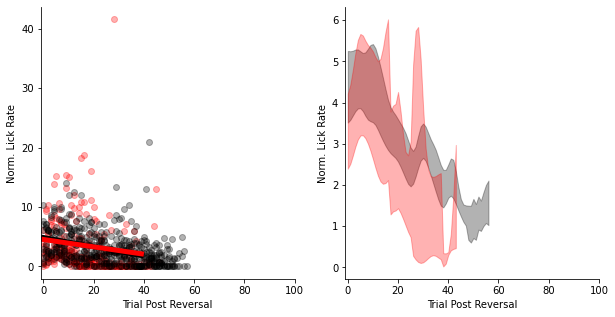

In [51]:
fig, ax = plt.subplots(1,2,figsize=[10,5])

max_x = 0

for lr in ko_lr_rev:    
    x = np.arange(0,lr.shape[0])
    max_x = np.maximum(lr.shape[0],max_x)
    ax[0].scatter(x,lr,color='red', alpha=.3)
    
for lr in ctrl_lr_rev:
    x = np.arange(0,lr.shape[0])
    max_x = np.maximum(lr.shape[0],max_x)
    ax[0].scatter(x,lr,color='black',alpha=.3)

print(max_x)
ko_lr_arr = np.zeros([len(ko_lr_rev), max_x])*np.nan
ctrl_lr_arr = np.zeros([len(ctrl_lr_rev), max_x])*np.nan
for i, lr in enumerate(ko_lr_rev):
    n = lr.shape[0]
    ko_lr_arr[i,:n] = sp.ndimage.filters.gaussian_filter1d(lr,2)
    
for i, lr in enumerate(ctrl_lr_rev):
    n = lr.shape[0]
    ctrl_lr_arr[i,:n] = sp.ndimage.filters.gaussian_filter1d(lr,2)
    
trials = np.arange(0,40)
y = trials*lmm_resf.params['trial'] + lmm_resf.params['intercept']
ax[0].plot(trials, y, color = 'black',linewidth=5)
trials = np.arange(0,40)
y = trials*(lmm_resf.params['trial'] +lmm_resf.params['ko_x_trial']) + lmm_resf.params['intercept'] + lmm_resf.params['ko']
ax[0].plot(trials,y, color='red',linewidth=5)





    
x = np.arange(0, max_x)
mu,sem = np.nanmean(ctrl_lr_arr,axis=0), sp.stats.sem(ctrl_lr_arr, axis=0, nan_policy='omit')
ax[1].fill_between(x, mu+sem,mu-sem, color='black', alpha= .3)

mu,sem = np.nanmean(ko_lr_arr,axis=0), sp.stats.sem(ko_lr_arr, axis=0, nan_policy='omit')
ax[1].fill_between(x, mu+sem,mu-sem, color='red', alpha= .3)

for r in range(2):
    ax[r].set_xlim([-1,100])
    ax[r].spines['top'].set_visible(False)
    ax[r].spines['right'].set_visible(False)
    ax[r].set_xlabel('Trial Post Reversal')
    ax[r].set_ylabel('Norm. Lick Rate')
    
fig.savefig(os.path.join(figdir, 'reversal_early_lr.pdf'))

In [22]:
_df = df[(df['trial']>0) & (df['trial']<40)]
lmm_res = MixedLM(_df['lr'], _df[['ko', 'trial_norm', 'ko_x_trial_norm', 'intercept']], _df['mouse'], exog_re = _df['trial_norm'])
lmm_resf = lmm_res.fit()
print(lmm_resf.summary())
print(lmm_resf.pvalues)

           Mixed Linear Model Regression Results
Model:              MixedLM  Dependent Variable:  lr        
No. Observations:   588      Method:              REML      
No. Groups:         17       Scale:               8.7343    
Min. group size:    16       Log-Likelihood:      -1499.2946
Max. group size:    39       Converged:           Yes       
Mean group size:    34.6                                    
------------------------------------------------------------
                 Coef.  Std.Err.   z    P>|z|  [0.025 0.975]
------------------------------------------------------------
ko               -0.655    0.508 -1.289 0.197  -1.651  0.341
trial_norm       -4.185    3.670 -1.140 0.254 -11.378  3.009
ko_x_trial_norm   4.170    5.492  0.759 0.448  -6.594 14.935
intercept         4.235    0.322 13.165 0.000   3.604  4.865
trial_norm Var  115.500   16.520                            

ko                 1.973032e-01
trial_norm         2.542410e-01
ko_x_trial_norm    4.476741e-01


In [23]:
ko_slopes = np.array([get_early_lick_slope(u.single_mouse_concat_vr_sessions(mouse, date_inds=[6,])) for mouse in ko_mice])
ctrl_slopes = np.array([get_early_lick_slope(u.single_mouse_concat_vr_sessions(mouse, date_inds=[6,])) for mouse in ctrl_mice])

['LR', 'block_number', 'sess_num_ravel', 'sess_num']
['LR', 'block_number', 'sess_num_ravel', 'sess_num']
['LR', 'block_number', 'sess_num_ravel', 'sess_num']
['LR', 'block_number', 'sess_num_ravel', 'sess_num']
['LR', 'block_number', 'sess_num_ravel', 'sess_num']
['LR', 'block_number', 'sess_num_ravel', 'sess_num']
['LR', 'block_number', 'sess_num_ravel', 'sess_num']
['LR', 'block_number', 'sess_num_ravel', 'sess_num']
['LR', 'block_number', 'sess_num_ravel', 'sess_num']
['LR', 'block_number', 'sess_num_ravel', 'sess_num']
['LR', 'block_number', 'sess_num_ravel', 'sess_num']
['LR', 'block_number', 'sess_num_ravel', 'sess_num']
['LR', 'block_number', 'sess_num_ravel', 'sess_num']
['LR', 'block_number', 'sess_num_ravel', 'sess_num']
['LR', 'block_number', 'sess_num_ravel', 'sess_num']
['LR', 'block_number', 'sess_num_ravel', 'sess_num']
['LR', 'block_number', 'sess_num_ravel', 'sess_num']
['LR', 'block_number', 'sess_num_ravel', 'sess_num']
['LR', 'block_number', 'sess_num_ravel', 'sess

(8,) (9,)
0.7579240524019176 0.4602390425136107
-0.09622504486493763 0.9233418401809065


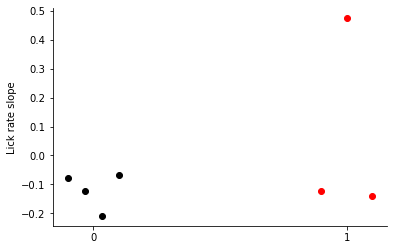

In [24]:
fig, ax = plt.subplots()
print(ko_slopes.shape,ctrl_slopes.shape)
# ax.scatter(np.linspace(-.1,.1,num=len(ko_mice))+1, ko_slopes, color='red')
ax.scatter(np.linspace(-.1,.1,num=3)+1, ko_slopes[5:], color='red')
# ax.scatter(np.linspace(-.1,.1,num=len(ctrl_mice)), ctrl_slopes, color='black')
ax.scatter(np.linspace(-.1,.1,num=4), ctrl_slopes[5:], color='black')
t,p = sp.stats.ttest_ind(ko_slopes, ctrl_slopes)
print(t,p)
t,p = sp.stats.ranksums(ko_slopes, ctrl_slopes)
print(t,p)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.set_ylabel('Lick rate slope')
ax.set_xticks([0,1])

fig.savefig(os.path.join(figdir, 'reversal_early_rz_slope.pdf'))
np.save("lick_slopes.npy", {'ko_slopes': ko_slopes, 'ctrl_slopes': ctrl_slopes})

In [120]:
# reversal lick rates
def return_lickmat(mice, date_inds = [8]):
    l_lickmat = np.zeros([len(mice), 60, 30])*np.nan
    r_lickmat = np.zeros([len(mice), 60, 30])*np.nan
    
    b_l = np.zeros([len(mice),1,1])
    b_r = np.zeros([len(mice),1,1])
    
    for i, mouse in enumerate(mice):
        concat_sess = u.single_mouse_concat_vr_sessions(mouse, date_inds = date_inds)
        
        b_mask = (concat_sess.trial_info['block_number']<2) * (concat_sess.trial_info['sess_num']==8)
        b_l_mask, b_r_mask = (b_mask * (concat_sess.trial_info['LR']==-1)), (b_mask*(concat_sess.trial_info['LR']==1))
    
        rev_mask = (concat_sess.trial_info['block_number']>=2)*(concat_sess.trial_info['sess_num']==8)

        l_rev_mask = rev_mask * (concat_sess.trial_info['LR']==-1)
        r_rev_mask = rev_mask * (concat_sess.trial_info['LR']==1)
        
        tmp_l = concat_sess.trial_matrices['licks'][l_rev_mask,:]
        max_trial = np.minimum(60, tmp_l.shape[0])
        print(max_trial)
        l_lickmat[i,:max_trial,:] = tmp_l[:max_trial,:]
        
        tmp_r = concat_sess.trial_matrices['licks'][r_rev_mask,:]
        max_trial = np.minimum(60, tmp_r.shape[0])
        print(max_trial)
        r_lickmat[i,:max_trial,:] = tmp_r[:max_trial,:]
        
        b_l[i] = np.nanmean(np.nanmean(concat_sess.trial_matrices['licks'][b_l_mask,:],axis=0))
        b_r[i] = np.nanmean(np.nanmean(concat_sess.trial_matrices['licks'][b_r_mask,:], axis=0))
        
    return l_lickmat/b_l, r_lickmat/b_r

In [121]:
ko_l_lickmat, ko_r_lickmat = return_lickmat(ko_mice[1:])
ctrl_l_lickmat, ctrl_r_lickmat = return_lickmat(ctrl_mice)

/home/mplitt/repos/TwoPUtils/TwoPUtils/sess.py:95: UserWarning: skipping checking keys, remaining initialization not guaranteed to work
  warnings.warn("skipping checking keys, remaining initialization not guaranteed to work")
/home/mplitt/repos/TwoPUtils/TwoPUtils/sess.py:227: UserWarning: Could not find sbxmat file at /mnt/BigDisk/2P_scratch/4467975.2/06_10_2020/YMaze_RewardReversal/YMaze_RewardReversal_001_005.mat
  warnings.warn("Could not find sbxmat file at %s" % self.scanheader_file)
/home/mplitt/repos/TwoPUtils/TwoPUtils/sess.py:236: UserWarning: Could not find sbx file at /mnt/BigDisk/2P_scratch/4467975.2/06_10_2020/YMaze_RewardReversal/YMaze_RewardReversal_001_005.sbx
  warnings.warn("Could not find sbx file at %s" % self.scan_file)


06_10_2020 YMaze_RewardReversal


/home/mplitt/repos/TwoPUtils/TwoPUtils/sess.py:227: UserWarning: Could not find sbxmat file at /mnt/BigDisk/2P_scratch/4467975.2/06_10_2020/YMaze_LNovel/YMaze_LNovel_001_008.mat
  warnings.warn("Could not find sbxmat file at %s" % self.scanheader_file)
/home/mplitt/repos/TwoPUtils/TwoPUtils/sess.py:236: UserWarning: Could not find sbx file at /mnt/BigDisk/2P_scratch/4467975.2/06_10_2020/YMaze_LNovel/YMaze_LNovel_001_008.sbx
  warnings.warn("Could not find sbx file at %s" % self.scan_file)


06_10_2020 YMaze_LNovel
['LR', 'block_number', 'sess_num_ravel', 'sess_num']
['LR', 'block_number', 'sess_num_ravel', 'sess_num']
32
38


/home/mplitt/repos/TwoPUtils/TwoPUtils/sess.py:227: UserWarning: Could not find sbxmat file at /mnt/BigDisk/2P_scratch/4467975.3/06_10_2020/YMaze_RewardReversal/YMaze_RewardReversal_001_004.mat
  warnings.warn("Could not find sbxmat file at %s" % self.scanheader_file)
/home/mplitt/repos/TwoPUtils/TwoPUtils/sess.py:236: UserWarning: Could not find sbx file at /mnt/BigDisk/2P_scratch/4467975.3/06_10_2020/YMaze_RewardReversal/YMaze_RewardReversal_001_004.sbx
  warnings.warn("Could not find sbx file at %s" % self.scan_file)


06_10_2020 YMaze_RewardReversal


/home/mplitt/repos/TwoPUtils/TwoPUtils/sess.py:227: UserWarning: Could not find sbxmat file at /mnt/BigDisk/2P_scratch/4467975.3/06_10_2020/YMaze_LNovel/YMaze_LNovel_001_008.mat
  warnings.warn("Could not find sbxmat file at %s" % self.scanheader_file)
/home/mplitt/repos/TwoPUtils/TwoPUtils/sess.py:236: UserWarning: Could not find sbx file at /mnt/BigDisk/2P_scratch/4467975.3/06_10_2020/YMaze_LNovel/YMaze_LNovel_001_008.sbx
  warnings.warn("Could not find sbx file at %s" % self.scan_file)


06_10_2020 YMaze_LNovel
['LR', 'block_number', 'sess_num_ravel', 'sess_num']
['LR', 'block_number', 'sess_num_ravel', 'sess_num']
22
18
06_10_2020 YMaze_RewardReversal
06_10_2020 YMaze_LNovel
['LR', 'block_number', 'sess_num_ravel', 'sess_num']
['LR', 'block_number', 'sess_num_ravel', 'sess_num']
53
46
06_10_2020 YMaze_RewardReversal
06_10_2020 YMaze_LNovel
['LR', 'block_number', 'sess_num_ravel', 'sess_num']
['LR', 'block_number', 'sess_num_ravel', 'sess_num']
20
25


FileNotFoundError: [Errno 2] No such file or directory: '/home/mplitt/YMazeSessPkls/Cre7/roi_aligner_results.pkl'

-0.7564118870914543 0.47408505643251087
-0.10320777171440261 0.9206926481087123


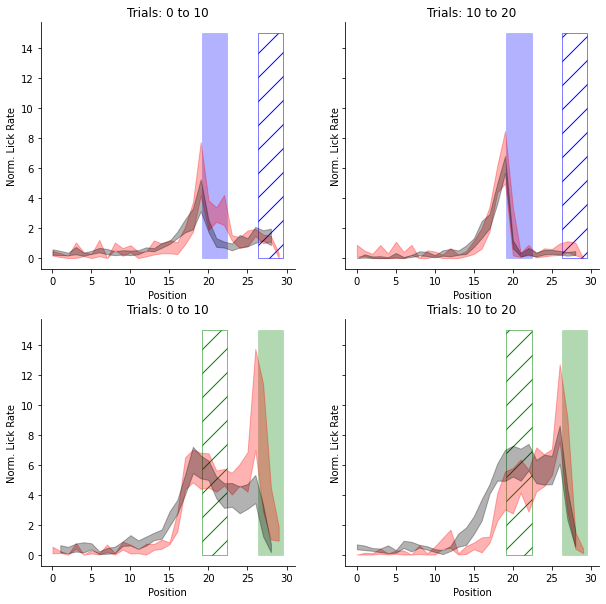

In [29]:
fig,ax = plt.subplots(2,2, figsize= [10,10], sharey=True)
for i,start in enumerate(range(0,20,10)):
    
    ax[0,i].fill_betweenx([0,15], sess.rzone_late['tfront']-sess.trial_matrices['bin_centers'][0], 
                          sess.rzone_late['tback']-sess.trial_matrices['bin_centers'][0], 
                          color="none",alpha=1, hatch='/', edgecolor='blue',linewidth=0.5)
    ax[0,i].fill_betweenx([0,15], sess.rzone_early['tfront']-sess.trial_matrices['bin_centers'][0], 
                          sess.rzone_early['tback']-sess.trial_matrices['bin_centers'][0], 
                          color="blue",alpha=.3, linewidth=0.5)
    
    mu, sem = np.nanmean(np.nanmean(ko_l_lickmat[:,start:start+10,:],axis=1),axis=0), sp.stats.sem(np.nanmean(ko_l_lickmat[:,start:start+10,:],axis=1),axis=0)
#     ax[i].plot(ko_l_lickmat[:,start:start+10,:].mean(axis=1).T)
    ax[0,i].fill_between(np.arange(30), mu-sem, mu+sem, color='red', alpha=.3)
    
    mu, sem = ctrl_l_lickmat[:,start:start+10,:].mean(axis=1).mean(axis=0), sp.stats.sem(ctrl_l_lickmat[:,start:start+10,:].mean(axis=1),axis=0)
    ax[0,i].fill_between(np.arange(30), mu-sem, mu+sem, color='black', alpha=.3)
    
    
    t_early_bins = sess.trial_matrices['bin_edges'][1:]
    rzone_early = (t_early_bins>=sess.rzone_early['t_antic'])*(t_early_bins<=sess.rzone_early['tfront'])
    _ko = np.nanmean(np.nanmean(ko_l_lickmat[:,start:start+10,:],axis=1)[:,rzone_early],axis=1)
    _ctrl = np.nanmean(np.nanmean(ctrl_l_lickmat[:,start:start+10,:],axis=1)[:,rzone_early],axis=1)
    t,p = sp.stats.ttest_ind(_ko,_ctrl)
    print(t,p)
    
    
    ax[1,i].fill_betweenx([0,15], sess.rzone_early['tfront']-sess.trial_matrices['bin_centers'][0], 
                          sess.rzone_early['tback']-sess.trial_matrices['bin_centers'][0], 
                          color="none",alpha=1, hatch='/', edgecolor='green',linewidth=0.5)
    ax[1,i].fill_betweenx([0,15], sess.rzone_late['tfront']-sess.trial_matrices['bin_centers'][0], 
                          sess.rzone_late['tback']-sess.trial_matrices['bin_centers'][0], 
                          color="green",alpha=.3, linewidth=0.5)
    
    mu, sem = np.nanmean(np.nanmean(ko_r_lickmat[:,start:start+10,:],axis=1),axis=0), sp.stats.sem(np.nanmean(ko_r_lickmat[:,start:start+10,:], axis=1),axis=0)
#     ax[i].plot(ko_l_lickmat[:,start:start+10,:].mean(axis=1).T)
    ax[1,i].fill_between(np.arange(30), mu-sem, mu+sem, color='red', alpha=.3)
    
    mu, sem = ctrl_r_lickmat[:,start:start+10,:].mean(axis=1).mean(axis=0), sp.stats.sem(ctrl_r_lickmat[:,start:start+10,:].mean(axis=1),axis=0)
    ax[1,i].fill_between(np.arange(30), mu-sem, mu+sem, color='black', alpha=.3)
    
    for r in [0,1]:
        ax[r,i].spines['top'].set_visible(False)
        ax[r,i].spines['right'].set_visible(False)
        
        ax[r,i].set_xlabel('Position')
        ax[r,i].set_ylabel('Norm. Lick Rate')
        ax[r,i].set_title("Trials: %d to %d" % (start, start+10))
fig.savefig(os.path.join(figdir, 'reversal_return_lickrate.pdf'))

{'date': '05_12_2020', 'scene': 'YMaze_LNovel', 'session': 1, 'scan': 2, 'novel_arm': -1, 'ravel_ind': 5}


/home/mplitt/repos/TwoPUtils/TwoPUtils/sess.py:95: UserWarning: skipping checking keys, remaining initialization not guaranteed to work
  warnings.warn("skipping checking keys, remaining initialization not guaranteed to work")
/home/mplitt/repos/TwoPUtils/TwoPUtils/sess.py:227: UserWarning: Could not find sbxmat file at /media/mplitt/Backup Plus3/2P_Data/4467333.1/05_12_2020/YMaze_LNovel/YMaze_LNovel_001_002.mat
  warnings.warn("Could not find sbxmat file at %s" % self.scanheader_file)
/home/mplitt/repos/TwoPUtils/TwoPUtils/sess.py:236: UserWarning: Could not find sbx file at /media/mplitt/Backup Plus3/2P_Data/4467333.1/05_12_2020/YMaze_LNovel/YMaze_LNovel_001_002.sbx
  warnings.warn("Could not find sbx file at %s" % self.scan_file)
/home/mplitt/repos/TwoPUtils/TwoPUtils/sess.py:403: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  v = v[np.newaxis, :]


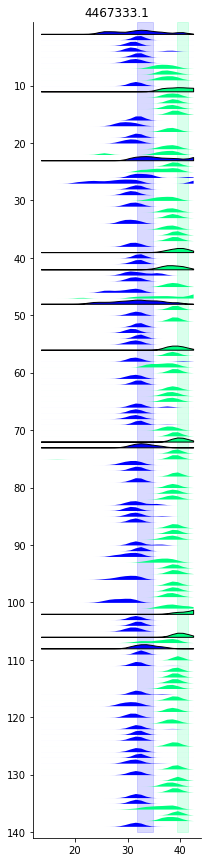

In [56]:
sess = u.load_single_day(ctrl_mice[4],5)

sess.add_timeseries(rewards=sess.vr_data['reward'])
sess.add_pos_binned_trial_matrix('rewards')

omis = ~(np.nansum(sess.trial_matrices['rewards'],axis=-1)>0)

fig, ax = plt.subplots(figsize=[3,15])
x = sess.trial_matrices['bin_centers']
cm = plt.cm.get_cmap('winter')
lr = sess.trial_info['LR']
mat = sess.trial_matrices['licks']
mat[np.isnan(mat)] = 0
mat = sp.ndimage.filters.gaussian_filter1d(mat,1,axis=1)
mat/=np.amax(mat,axis=1,keepdims=True)*1.4
# mat = filters.gaussian_filter1d(sess.trial_matrices['licks'], sig, axis=1)

for ind, i in enumerate(np.arange(mat.shape[0] - 1, 0, -1)):
    if omis[ind]:
        ax.fill_between(x, mat[ind, :] + i, y2=i, color=cm(np.float(lr[ind])), edgecolor='black')
    else:
        ax.fill_between(x, mat[ind, :] + i, y2=i, color=cm(np.float(lr[ind])), linewidth=.001)
        

ax.fill_betweenx([0,lr.shape[0]+1],31.9,34.8,color=plt.cm.winter(0.),alpha=.15,zorder=0)
ax.fill_betweenx([0,lr.shape[0]+1],39.5,41.6,color=plt.cm.winter(1.),alpha=.15,zorder=0)

ax.set_yticks(np.arange(0, mat.shape[0], 10))
ax.set_yticklabels(["%d" % i for i in np.arange(mat.shape[0], 0, -10).tolist()])
ax.set_ylim([-1,lr.shape[0]+1])
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.set_title(sess.mouse)

fig.savefig(os.path.join(figdir,"single_sess_licks","Licks_%s_%s.pdf" % (sess.mouse,sess.date)))